# Business Owner Gender's Impact on USAID Loan Amounts

## Project 1

### Introduction

The socioeconomic development of underprivileged regions of the world has been a focus of local and international organizations for decades. According to the OECD, funding from high-income countries to over 50,000 NGOs and thousands of small grassroot organizations reached nearly $2 billion in 2004. One such organization is the United States Agency for International Development's (USAID) Development Credit Authority (DCA) which provides loans to private lenders, financial institutions, and development organizations to promote growth and development in developing countries. The goal is to help these regions become more self-sufficient by providing resources, educating citizens on entrepreneurship, and partnering with them to set up initiatives. Entrepreneurship aids these countries by growing their economy and reducing poverty and unemployment (Msosa, 2023).

However, the world at large has repeatedly fallen short of the development goals that were set. While there are numerous reasons for this, one glaring cause is the lack of proper utilization of female workers in these developing countries. Women make up more than fifty percent of the global population and seventy percent of those living below the poverty line (Srivastava et al., n.d.) which, therefore, mean that developing countries are functioning below their highest level of productivity and, therefore, generating less value than they are able to with all their human capital. There are numerous barriers that women face that prevent them from pursuing entrepreneurial goals including  lack of financial support, education, and training (Zwane et al., 2023). Societal norms also dictate women’s leadership skills and growth mindset. The socio-economic and contextual circumstances that vary between different countries often define entrepreneurship as masculine albeit to different degrees (Gupta et al., 2022). Women who view themselves as feminine see high-growth entrepreneurship as masculine and, as a result, do not strive for success themselves. This is less apparent in consumer-oriented industries, such as retail trade and service sectors, as these are sectors where women are more confident in leading and seeking opportunities (Alona, 2022). Women also believe that their economic contributions are undervalued by their governments and many female entrepreneurs are unaware of existing support programs (Zwane et al., 2023). To help in supporting the establishment and growth of female-owned businesses, governments and organizations such as the DCA need to focus on providing women with entrepreneurial education and training, market information, adequate funds, and access to networks that would allow them to find support in the long-run (Mashapure et al., 2022). Entrepreneurial education not only arms business owners with the knowledge to carry out their tasks, but also gives them the confidence to work towards growing their businesses  (Janowski et al., 2023). Most importantly, women need to be made aware of such programs and their benefits. In Nigeria, for example, 92.1 percent of female entrepreneurs said that they never accessed government funds (Adeosun et al., 2023). When making policies and initiatives for this cause, government regulators must tailor them to female entrepreneurs as they behave differently than male entrepreneurs. For example, when a country’s economy is stable and growing, male entrepreneurs benefit a lot as their social capital and economic ambitions allow them to take risks and innovate, unlike female entrepreneurs (Pourya et al., 2022). 

This paper aims to build on previous research to study whether or not gender discrimination exists in the decisions made by the DCA about the organizations they support, understand the regions and industries in which women are impacted the most, and study the differences in economic factors in different countries to analyze their correlation with the amount of support female entrepreneurs receive. The goal is to help organizations such as the DCA become more aware of the places where they would need to be more attentive and intentional in supporting women.

The data provided by the USAID that will be used to conduct the following experiment includes the following information: the country in which an organization is located, the amount of loan it was provided in USD, the local currency name, the business sector, city, state name and code, region name, longitude, latitude, whether or not it is owned by a women, whether or not it is a first time borrower, and its business size. This paper will begin by cleaning the data, conducting statistical analysis to study the relations between these variables, create maps to study the spread of certain variables across the globe, and then build a machine learning model to support organizations such as the USAID in their decision making processes. Data on the economic factors of various countries have also been collected from the OECD including: percentage of men participating in the workforce, percentage of women participating in the workforce, male literacy rate, female literacy rate, the GDP of a country in USD, and the government expense in USD. All of these data have been collected for the year 2019 as this was the latest year for which all the listed information was available.

### Data Cleaning and Coding 

In order to conduct the following experiment, this paper will study the relation between the monetary value in USD invested in each organization and the following characteristics of each organization: the country it is located in, the business sector it falls under, the size of the organization, whether or not the organization is a first time borrower, and whether or not the owner identifies as a woman. It is assumed that the USAID provides more financial support to organizations that operate in areas that they want to support. The goal is to try and understand the percentage of women in different types of organizations across countries, industries, and business sizes, and to see how much support they receive. 

In [ ]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes
! pip install tabulate
!pip install prettytable

import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.colors as mplc
import matplotlib.patches as patches
import matplotlib.pyplot as plt
from tabulate import tabulate
from matplotlib.ticker import FuncFormatter
!pip install linearmodels
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS
! pip install stargazer
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D
from prettytable import PrettyTable
from IPython.display import HTML
import seaborn as sns
from sklearn import (
    linear_model, metrics, pipeline, model_selection
)
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

%matplotlib inline

df = pd.read_csv('userssharedsdfusaiddevelopmentcagloantransactions.csv')

To clean the dataset above to simplify future analysis, the columns of interest has been renamed and rows without useful data have been dropped.

In [2]:
df = df.rename(columns={'Amount (USD)': 'loan_amount', 'Business Sector': 'business_sector', 'Is Woman Owned?': 'female_owner', 'Is First Time Borrower?': 'first_time_borrower', 'State/Province/Region Country Name': 'country', 'Business Size': 'business_size'})

In [3]:
df.dropna(subset=['business_sector'], inplace=True)
df.dropna(subset=['country'], inplace=True)
df.dropna(subset=['female_owner'], inplace=True)
df.dropna(subset=['first_time_borrower'], inplace=True)
df.dropna(subset=['business_size'], inplace=True)

The way business sizes have been defined in the dataset would make further analysis difficult to interpret. Therefore, a new column has been created to group the organizations into small, medium, and large categories.

In [4]:
print(df['business_size'].unique())

['11--50' '1--5' '6--10' '51--100' '>100']


In [5]:
df['business_size_categories'] = ['small' if x == '1--5' else 'small' if x == '6--10' else 'medium' if x == '11--50' else 'medium' if x == '51-100' else 'large' if x == '>100' else 'unknown' for x in df['business_size']]

### Summary Statistics Tables

The following section studies the characteristics of the dataset more in depth with focus on the difference in support that male and female owners have received in each category.

In [6]:
group_1 = df.groupby(['business_size_categories', 'female_owner']).agg({'loan_amount': ['min', 'mean', 'max']})
group_1 = group_1.reset_index()
group_1.columns = ['business_size', 'female_owner', 'min_loan', 'mean_loan', 'max_loan']
def currency_format(x):
    return "${:,.2f}".format(x)
for col in ['min_loan', 'mean_loan', 'max_loan']:
    group_1[col] = group_1[col].apply(currency_format)
table = tabulate(group_1, headers='keys', tablefmt='pretty', showindex=False, colalign=("right",) * len(group_1.columns))
print(table)

+---------------+--------------+------------+-------------+---------------+
| business_size | female_owner |   min_loan |   mean_loan |      max_loan |
+---------------+--------------+------------+-------------+---------------+
|         large |            0 |    $437.82 | $647,826.95 | $4,000,000.00 |
|         large |            1 | $14,995.31 | $243,910.84 | $1,046,484.86 |
|        medium |            0 |    $227.72 |  $87,464.49 | $5,302,226.93 |
|        medium |            1 |    $326.52 |  $39,124.71 |   $935,908.32 |
|         small |            0 |     $86.81 |   $9,409.75 | $6,000,000.00 |
|         small |            1 |     $69.93 |   $3,511.62 | $1,040,000.00 |
|       unknown |            0 |    $553.64 | $216,195.45 | $3,000,000.00 |
|       unknown |            1 |  $1,108.56 | $116,571.91 |   $538,590.01 |
+---------------+--------------+------------+-------------+---------------+


Comparing the difference between companies owned by male and female entrepreneurs show that, on average, male entrepreneurs receive larger amounts on loans than female entrepreneurs in every business size categories. Female-owned businesses with more workers do receive more loans as their sizes increase, but not as much as for male-owned businesses. For example, the average loan received by a small female-owned company receives 3,511.62 USD while a medium female-owned company receives 39,124.71 USD. However, these are both less than their male counterparts with small male-owned companies receiving 9,409.75 USD on average and medium male-owned companies receiving 87,464.49 USD on average. The spread of loans that male-owned businesses receive is also greater thus showing that those companies receive support on various scales.

In [7]:
group_2 = df.groupby(['business_sector', 'female_owner']).agg({'loan_amount': ['min', 'mean', 'max', 'sum']})
group_2 = group_2.reset_index()
group_2.columns = ['business_sector', 'female_owner', 'min_loan', 'mean_loan', 'max_loan', 'total_loan']
top_business_sectors = group_2.groupby('business_sector')['total_loan'].sum().nlargest(3).index
group_2.loc[~group_2['business_sector'].isin(top_business_sectors), 'business_sector'] = 'Others'
group_2 = group_2.groupby(['business_sector', 'female_owner']).agg({'min_loan': 'min', 'mean_loan': 'mean', 'max_loan': 'max'})
format_currency = lambda x: "${:,.2f}".format(x)
for col in ['min_loan', 'mean_loan', 'max_loan']:
    group_2[col] = group_2[col].apply(format_currency)
group_2.reset_index(inplace=True)
table = tabulate(group_2, headers='keys', tablefmt='pretty', showindex=False, colalign=("right",) * len(group_2.columns))
print(table)

+-----------------+--------------+----------+------------+---------------+
| business_sector | female_owner | min_loan |  mean_loan |      max_loan |
+-----------------+--------------+----------+------------+---------------+
|     Agriculture |            0 |  $101.63 | $13,856.82 | $6,000,000.00 |
|     Agriculture |            1 |   $87.41 |  $5,887.27 | $1,027,667.98 |
|   Other Service |            0 |  $115.74 | $43,644.20 | $5,302,226.93 |
|   Other Service |            1 |  $113.25 |  $4,295.24 | $1,046,484.86 |
|          Others |            0 |  $174.83 | $64,148.36 | $4,000,000.00 |
|          Others |            1 |  $115.74 | $39,756.91 |   $935,908.32 |
|  Trade/Commerce |            0 |   $86.81 | $23,307.24 | $4,000,000.00 |
|  Trade/Commerce |            1 |   $69.93 |  $4,581.61 | $1,040,000.00 |
+-----------------+--------------+----------+------------+---------------+


Similar differences between the support that male and female entrepreneurs receive in terms of the magnitude of the loan amount and their spreads can be seen across different business sectors as well. In the agriculture industry, for example, female-owned businesses receive 5,887.27 USD on average while male-owned businesses receive 13,856.82 USD on average. 

In [8]:
group_3 = df.groupby(['first_time_borrower', 'female_owner']).agg({'loan_amount': ['min', 'mean', 'max']})
group_3 = group_3.reset_index()
group_3.columns = ['first_time_borrower', 'female_owner', 'min_loan', 'mean_loan', 'max_loan']
format_currency = lambda x: "${:,.2f}".format(x)
for col in ['min_loan', 'mean_loan', 'max_loan']:
    group_3[col] = group_3[col].apply(format_currency)
table = tabulate(group_3, headers='keys', tablefmt='pretty', showindex=False, colalign=("right",) * len(group_3.columns))
print(table)

+---------------------+--------------+----------+------------+---------------+
| first_time_borrower | female_owner | min_loan |  mean_loan |      max_loan |
+---------------------+--------------+----------+------------+---------------+
|                   0 |            0 |  $101.63 | $22,924.32 | $4,000,000.00 |
|                   0 |            1 |   $69.93 |  $4,975.03 |   $814,814.81 |
|                   1 |            0 |   $86.81 | $19,031.11 | $6,000,000.00 |
|                   1 |            1 |  $114.81 |  $7,508.65 | $1,046,484.86 |
+---------------------+--------------+----------+------------+---------------+


The difference in spread and magnitude also persist whether or not a company is a first-time loan borrower thus indicating that male-owned companies receive more financial support than female-companies from inception and this continues throughout their various stages in the growth-cycle.

In [9]:
group_4 = df.groupby(['country', 'female_owner']).agg({'loan_amount': ['min', 'mean', 'max']})
group_4 = group_4.reset_index()
group_4.columns = ['country', 'female_owner', 'min_loan', 'mean_loan', 'max_loan']
country_totals = group_4.groupby('country')['mean_loan'].sum()
top_countries = country_totals.nlargest(3).index
group_4.loc[~group_4['country'].isin(top_countries), 'country'] = 'Others'
group_4 = group_4.groupby(['country', 'female_owner']).agg({'min_loan': 'min', 'mean_loan': 'mean', 'max_loan': 'max'})
format_currency = lambda x: "${:,.2f}".format(x)
for col in ['min_loan', 'mean_loan', 'max_loan']:
    group_4[col] = group_4[col].apply(format_currency)
group_4.reset_index(inplace=True)
table = tabulate(group_4, headers='keys', tablefmt='pretty', showindex=False, colalign=("right",) * len(group_4.columns))
print(table)

+----------+--------------+---------------+---------------+---------------+
|  country | female_owner |      min_loan |     mean_loan |      max_loan |
+----------+--------------+---------------+---------------+---------------+
|     Mali |            0 |    $98,703.04 |   $769,277.88 | $1,354,882.42 |
|     Mali |            1 | $1,046,484.86 | $1,046,484.86 | $1,046,484.86 |
|   Mexico |            0 |   $162,855.84 | $2,912,721.92 | $5,302,226.93 |
|   Others |            0 |        $86.81 |   $134,002.71 | $6,000,000.00 |
|   Others |            1 |        $69.93 |    $50,723.34 | $1,040,000.00 |
| Zimbabwe |            0 |   $416,000.00 | $2,712,888.89 | $4,000,000.00 |
+----------+--------------+---------------+---------------+---------------+


Interestingly, it seems that the trend of male-owned businesses receiving more loans than female-owned businesses do not hold in between countries. This is helpful as it would allow further research into socioeconomic differences between these countries that might allow insight into why certain differences exist within them. However, as previous research has shown that cultural biases play a role in how much support women entrepreneurs receive, further analysis is required to make a conclusive statement. 

### Plots, Histograms, and Figures

This section will probe deeper into how much the DCA supports each category of organizations. This will help in understanding the extent to which the lack of financial support for female-owned businesses is due to the gender of their owners on a larger scale.

In [ ]:
male_color = '#cccccc'
female_color = '#b52b2b'

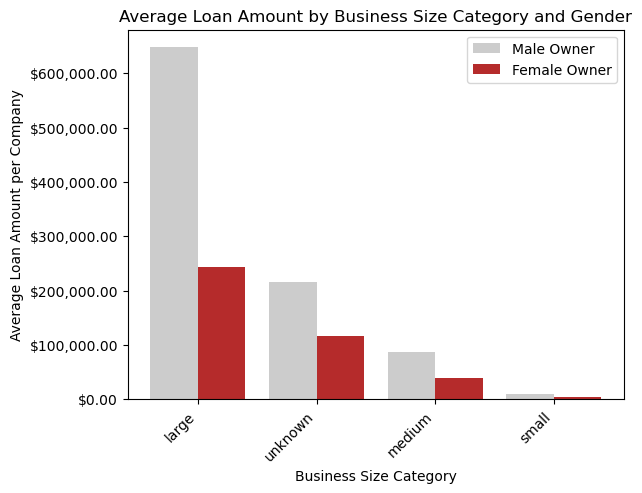

In [107]:
grouped_data_0 = df[df['female_owner'] == 0].groupby('business_size_categories')['loan_amount'].mean()
grouped_data_1 = df[df['female_owner'] == 1].groupby('business_size_categories')['loan_amount'].mean()
grouped_df_0 = grouped_data_0.reset_index().sort_values(by='loan_amount', ascending=False)
grouped_df_1 = grouped_data_1.reset_index().sort_values(by='loan_amount', ascending=False)
bar_width = 0.4
bar_positions_0 = np.arange(len(grouped_df_0))
bar_positions_1 = [pos + bar_width for pos in bar_positions_0]
plt.bar(bar_positions_0, grouped_df_0['loan_amount'], width=bar_width, label='Male Owner', color=male_color)
plt.bar(bar_positions_1, grouped_df_1['loan_amount'], width=bar_width, label='Female Owner', color=female_color)
def dollars_with_commas_and_decimals(x, pos):
    'The two args are the value and tick position'
    return '${:,.2f}'.format(x)
formatter = FuncFormatter(dollars_with_commas_and_decimals)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel("Business Size Category")
plt.ylabel("Average Loan Amount per Company")
plt.title("Average Loan Amount by Business Size Category and Gender")
plt.xticks(bar_positions_0 + bar_width / 2, grouped_df_0['business_size_categories'], rotation=45, ha='right')
plt.legend()
plt.show()

The graph above suppports previous analysis showing that female-owned businesses receive significantly less loans compared to male-owned businesses across different business size categories.

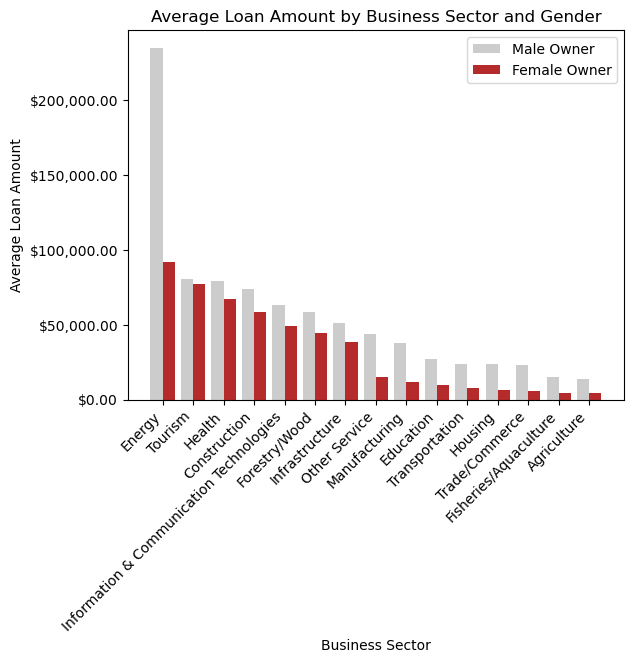

In [109]:
grouped_data_0 = df[df['female_owner'] == 0].groupby('business_sector')['loan_amount'].mean()
grouped_data_1 = df[df['female_owner'] == 1].groupby('business_sector')['loan_amount'].mean()
grouped_df_0 = grouped_data_0.reset_index().sort_values(by='loan_amount', ascending=False)
grouped_df_1 = grouped_data_1.reset_index().sort_values(by='loan_amount', ascending=False)
bar_width = 0.4
bar_positions_0 = np.arange(len(grouped_df_0))
bar_positions_1 = [pos + bar_width for pos in bar_positions_0]
plt.bar(bar_positions_0, grouped_df_0['loan_amount'], width=bar_width, label='Male Owner', color=male_color)
plt.bar(bar_positions_1, grouped_df_1['loan_amount'], width=bar_width, label='Female Owner', color=female_color)
def dollars_with_commas_and_decimals(x, pos):
    return '${:,.2f}'.format(x)
formatter = FuncFormatter(dollars_with_commas_and_decimals)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel("Business Sector")
plt.ylabel("Average Loan Amount")
plt.title("Average Loan Amount by Business Sector and Gender")
plt.xticks(bar_positions_0 + bar_width / 2, grouped_df_0['business_sector'], rotation=45, ha='right')
plt.legend()
plt.show()

This graph demonstrates that female-owned businesses receive less loans on average compared to male-owned businesses. However, the difference in sectors such as tourism and health is much smaller compared to other sectors. This supports previous research findings that stated that women in consumer-oriented industries are more confident in their abilities and seek out support. 

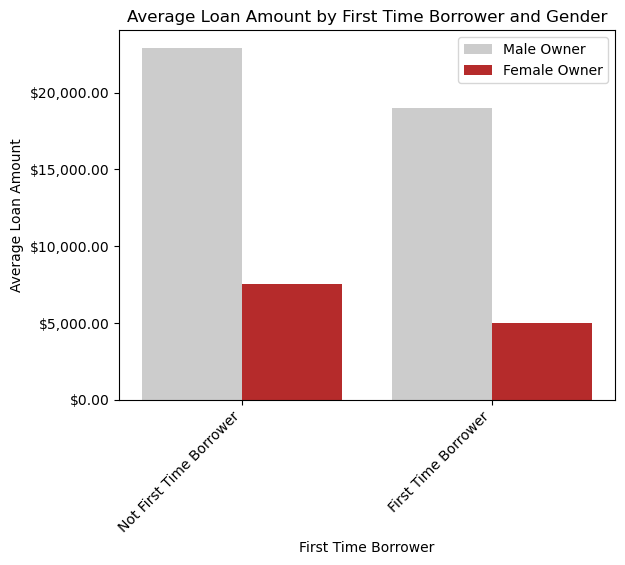

In [110]:
grouped_data_0 = df[df['female_owner'] == 0].groupby('first_time_borrower')['loan_amount'].mean()  # Use mean() instead of sum()
grouped_data_1 = df[df['female_owner'] == 1].groupby('first_time_borrower')['loan_amount'].mean()  # Use mean() instead of sum()
grouped_df_0 = grouped_data_0.reset_index().sort_values(by='loan_amount', ascending=False)
grouped_df_1 = grouped_data_1.reset_index().sort_values(by='loan_amount', ascending=False)
bar_width = 0.4
bar_positions_0 = np.arange(len(grouped_df_0))
bar_positions_1 = [pos + bar_width for pos in bar_positions_0]
plt.bar(bar_positions_0, grouped_df_0['loan_amount'], width=bar_width, label='Male Owner', color=male_color)
plt.bar(bar_positions_1, grouped_df_1['loan_amount'], width=bar_width, label='Female Owner', color=female_color)
def dollars_with_commas_and_decimals(x, pos):
    return '${:,.2f}'.format(x)
formatter = FuncFormatter(dollars_with_commas_and_decimals)
plt.gca().yaxis.set_major_formatter(formatter)
x_labels = {0: "Not First Time Borrower", 1: "First Time Borrower"}
plt.xlabel("First Time Borrower")
plt.ylabel("Average Loan Amount")
plt.title("Average Loan Amount by First Time Borrower and Gender")
plt.xticks(bar_positions_0 + bar_width / 2, [x_labels[val] for val in grouped_df_0['first_time_borrower']], rotation=45, ha='right')
plt.legend()
plt.show()

It can be seen that male-owned business receive more loans than female-owned businesses whether they are borrowing for the first time or not.

<Figure size 2000x1200 with 0 Axes>

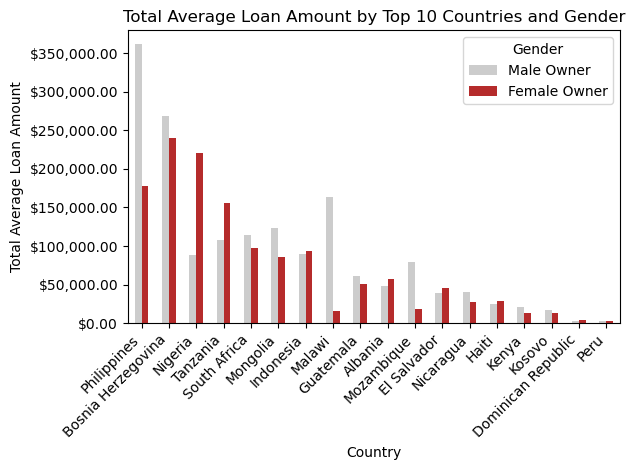

In [113]:
top_countries = df.groupby('country')['loan_amount'].sum().nlargest(20).index
top_countries = [country for country in top_countries if country not in ['Zimbabwe', 'Mexico']]
filtered_df = df[df['country'].isin(top_countries)]
grouped_data = filtered_df.groupby(['country', 'female_owner'])['loan_amount'].mean().unstack()
grouped_data = grouped_data.rename(columns={0: 'Male Owner', 1: 'Female Owner'})
grouped_data['Total Average'] = grouped_data.mean(axis=1)
grouped_data = grouped_data.sort_values(by='Total Average', ascending=False).drop(columns='Total Average')
plt.figure(figsize=(20, 12))
ax = grouped_data.plot(kind="bar", title="Total Average Loan Amount by Top 10 Countries and Gender",
                       color=[male_color, female_color])
def dollars_with_commas_and_decimals(y, pos):
    return '${:,.2f}'.format(y)
formatter = FuncFormatter(dollars_with_commas_and_decimals)
ax.yaxis.set_major_formatter(formatter)
plt.ylabel("Total Average Loan Amount")
plt.xlabel("Country")
plt.legend(title="Gender")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Studying the difference in loans received on average by male and female-owned businesses across multiple countries show that there are no trends showing that male entrepreneurs are financially supported more across the globe. As previously mentioned, however, cultural biases impact the amount of support female entrepreneurs receive and, therefore, geospatial data analysis will be conducted later in this paper to study the trends between countries on a broader scale. 

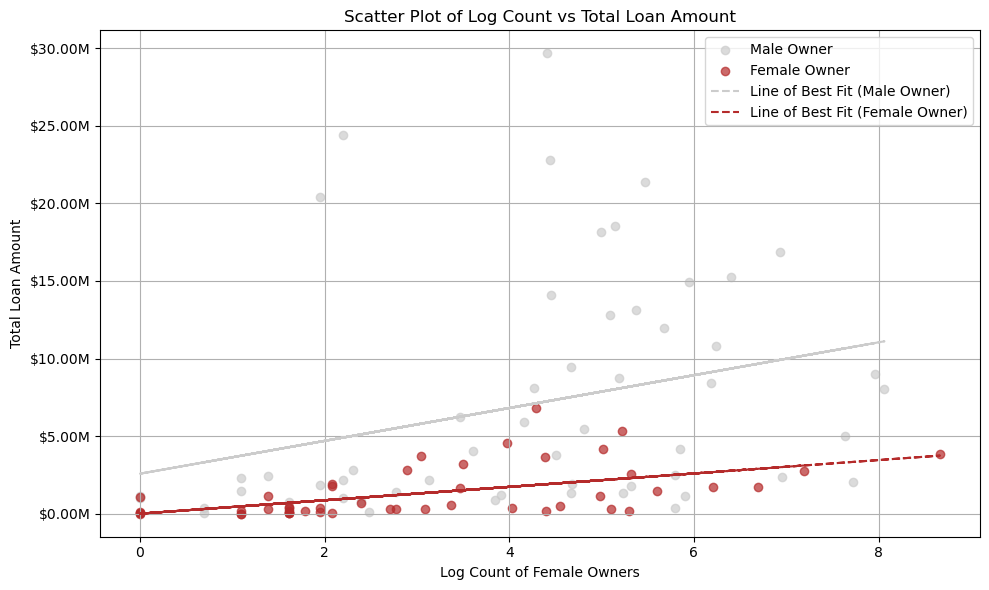

In [114]:
filtered_df = df[df['female_owner'].isin([0, 1])]
grouped_data = filtered_df.groupby(["country", "female_owner"]).agg(count=('country', 'size'), total_loan=('loan_amount', 'sum')).reset_index()
plt.figure(figsize=(10, 6))
grouped_data['log_count'] = np.log(grouped_data['count'])
plt.scatter(grouped_data[grouped_data['female_owner'] == 0]['log_count'],
            grouped_data[grouped_data['female_owner'] == 0]['total_loan'],
            color=male_color, alpha=0.7, label='Male Owner')
plt.scatter(grouped_data[grouped_data['female_owner'] == 1]['log_count'],
            grouped_data[grouped_data['female_owner'] == 1]['total_loan'],
            color=female_color, alpha=0.7, label='Female Owner')
plt.title('Scatter Plot of Log Count vs Total Loan Amount')
plt.xlabel('Log Count of Female Owners')
plt.ylabel('Total Loan Amount')
plt.grid(True)
def dollars_millions_commas_decimals(y, pos):
    return '${:,.2f}M'.format(y * 1e-6)
formatter = FuncFormatter(dollars_millions_commas_decimals)
plt.gca().yaxis.set_major_formatter(formatter)
fit_coeffs_male = np.polyfit(grouped_data[grouped_data['female_owner'] == 0]['log_count'],
                             grouped_data[grouped_data['female_owner'] == 0]['total_loan'], 1)
fit_line_male = np.polyval(fit_coeffs_male, grouped_data[grouped_data['female_owner'] == 0]['log_count'])
fit_coeffs_female = np.polyfit(grouped_data[grouped_data['female_owner'] == 1]['log_count'],
                               grouped_data[grouped_data['female_owner'] == 1]['total_loan'], 1)
fit_line_female = np.polyval(fit_coeffs_female, grouped_data[grouped_data['female_owner'] == 1]['log_count'])
plt.plot(grouped_data[grouped_data['female_owner'] == 0]['log_count'], fit_line_male, color=male_color, linestyle='--', label='Line of Best Fit (Male Owner)')
plt.plot(grouped_data[grouped_data['female_owner'] == 1]['log_count'], fit_line_female, color=female_color, linestyle='--', label='Line of Best Fit (Female Owner)')
plt.legend()
plt.tight_layout()
plt.show()

The above scatterplot shows whether countries with larger number of male and female-owned businesses see the companies receive more loans. The assumption is that more resources and support would be available for entrepreneurs as entrepreneurial initiatives becoem more common. Looking at the trend in the scatterplot this trend is apparent with loan amounts received by both male and female-owned businesses increasing. However, male-owned businesses see a large increase in the amount of loan they receive while the change in the loan amount received by female-owned businesses is much smaller.

## Project 2

### The Message 

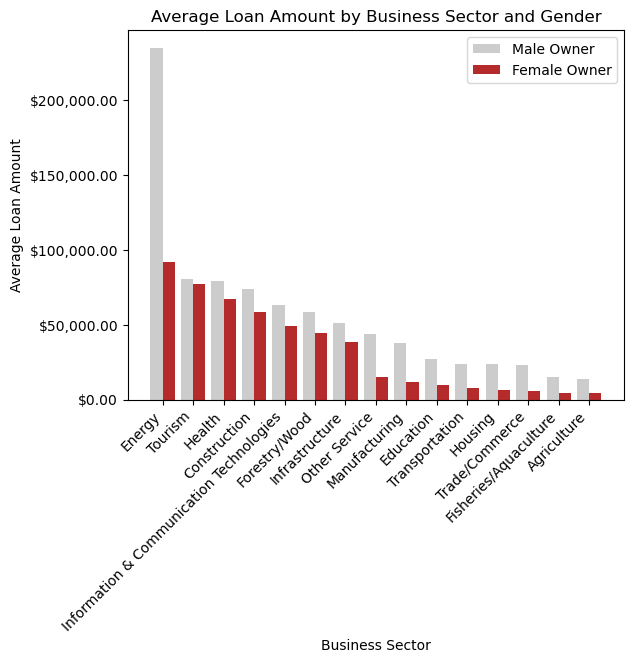

In [115]:
grouped_data_0 = df[df['female_owner'] == 0].groupby('business_sector')['loan_amount'].mean()
grouped_data_1 = df[df['female_owner'] == 1].groupby('business_sector')['loan_amount'].mean()
grouped_df_0 = grouped_data_0.reset_index().sort_values(by='loan_amount', ascending=False)
grouped_df_1 = grouped_data_1.reset_index().sort_values(by='loan_amount', ascending=False)
bar_width = 0.4
bar_positions_0 = np.arange(len(grouped_df_0))
bar_positions_1 = [pos + bar_width for pos in bar_positions_0]
plt.bar(bar_positions_0, grouped_df_0['loan_amount'], width=bar_width, label='Male Owner', color=male_color)
plt.bar(bar_positions_1, grouped_df_1['loan_amount'], width=bar_width, label='Female Owner', color=female_color)
def dollars_with_commas_and_decimals(x, pos):
    return '${:,.2f}'.format(x)
formatter = FuncFormatter(dollars_with_commas_and_decimals)
plt.gca().yaxis.set_major_formatter(formatter)
plt.xlabel("Business Sector")
plt.ylabel("Average Loan Amount")
plt.title("Average Loan Amount by Business Sector and Gender")
plt.xticks(bar_positions_0 + bar_width / 2, grouped_df_0['business_sector'], rotation=45, ha='right')
plt.legend()
plt.show()

The research conducted in this paper demonstrates that, while a large portion of the difference in the loan amount provided to organizations depends on the industry and global region that the organization is a part of, the gender of the owner of the business and the socio-economic factors within a country that impact male and female entrepreneurs differently is a significant indicator of the amount of financial support an organization might receive from the DCA as male-owned businesses have received larger amount of loans than female-owned businesses when compared across various categories such as different business sectors and business sizes.

### Maps and Interpretation

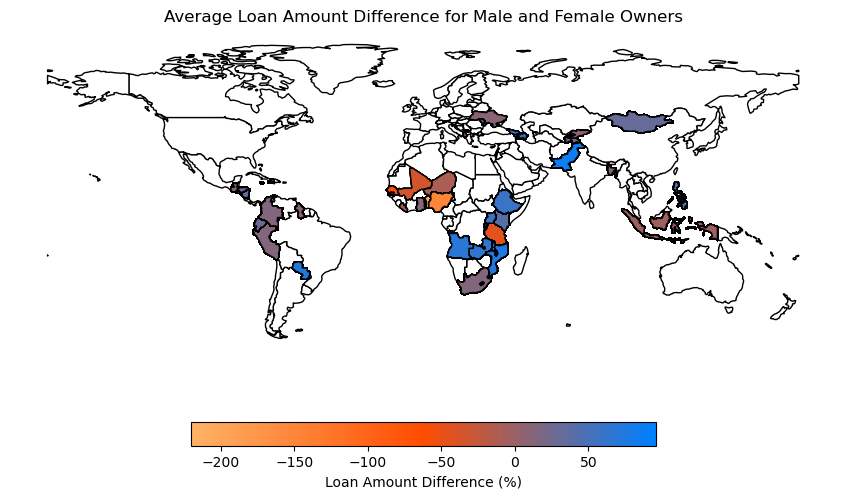

In [20]:
world_1 = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_1 = world_1.set_index("iso_a3")
world_country = world_1.merge(df, left_on='name', right_on='country', how='inner')
world_country_male_owner = world_country[world_country['female_owner'] == 0]
grouped_data = world_country_male_owner.groupby("country")['loan_amount'].mean().reset_index(name='average_loan_amount')
world_country = world_country.merge(grouped_data, on='country')
world_country_female_owner = world_country[world_country['female_owner'] == 1]
grouped_data_female_owner = world_country_female_owner.groupby("country")['loan_amount'].mean().reset_index(name='average_loan_amount_female')
world_country = world_country.merge(grouped_data_female_owner, on='country')
world_country['loan_amount_difference'] = (world_country['average_loan_amount'] - world_country['average_loan_amount_female']) / world_country['average_loan_amount'] * 100
intense_orange_blue_cmap = mcolors.LinearSegmentedColormap.from_list('intense_orange_blue_colormap', [(1.0, 0.7, 0.4), (1.0, 0.3, 0.0), (0.0, 0.5, 1.0)], N=100)
fig, gax = plt.subplots(figsize=(12, 6))
world_1[world_1['continent'] != 'Antarctica'].plot(ax=gax, edgecolor='black', color='white')
gax.set_title('Average Loan Amount Difference for Male and Female Owners')
world_country.plot(ax=gax, edgecolor='black', column='loan_amount_difference', legend=True, cmap=intense_orange_blue_cmap, legend_kwds={'label': "Loan Amount Difference (%)", 'orientation': 'horizontal', 'shrink': 0.5})
gax.set_axis_off()
plt.show()

The map above shows the percentage difference in the average loan amount received by male and female-owned businesses. While the map agrees with previous analysis where it was found that whether or not male or female-owned businesses receive more loans vary from country to country, it can seen here that trends are more apparent in certain regions. While Central America, Western Africa, and Eastern Asia seem to have only minor differences between male and female-owned businesses, region in Southern Africa and Western Asia see male-owned businesses receive significantly larger amounts of loans than male-owned businesses. This finding is supported by previous research that showed that differences in regional societal gender based expectations impacts how women perceive a career in entrepreneurship and the support they have access to to grow their businesses. 

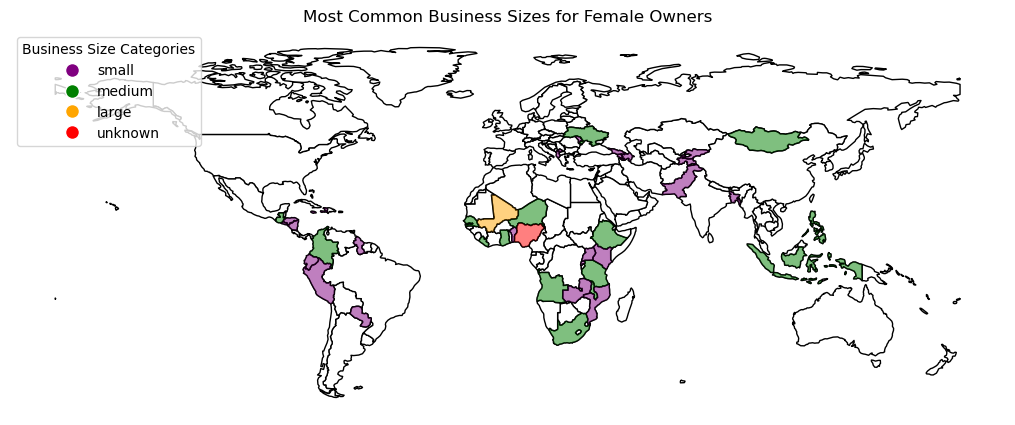

In [17]:
world_2 = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_2 = world_2.set_index("iso_a3")
world_bizz = world_2.merge(df, left_on='name', right_on='country', how='inner')
world_bizz_female_owner_1 = world_bizz[world_bizz['female_owner'] == 1]
grouped_data = world_bizz_female_owner_1.groupby("country").agg({'loan_amount': 'sum', 'geometry': 'first', 'business_size_categories': 'first'})
world_bizz_female_owner_1 = gpd.GeoDataFrame(grouped_data, geometry='geometry')
distinct_colors = ['purple', 'green', 'orange', 'red', 'blue', 'yellow', 'cyan', 'magenta', 'lime', 'pink']
category_color_map = {category: distinct_colors[idx % len(distinct_colors)]
                      for idx, category in enumerate(world_bizz_female_owner_1['business_size_categories'].unique())}
world_bizz_female_owner_1['color'] = world_bizz_female_owner_1['business_size_categories'].map(category_color_map)
fig, gax = plt.subplots(figsize=(30, 5))
world_2[world_2['continent'] != 'Antarctica'].plot(ax=gax, edgecolor='black', color='white')
gax.set_title('Most Common Business Sizes for Female Owners')
world_bizz_female_owner_1.plot(ax=gax, edgecolor='black', color=world_bizz_female_owner_1['color'], legend=False, alpha=0.5)
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=category)
                   for category, color in category_color_map.items()]
gax.legend(handles=legend_elements, title='Business Size Categories', loc='upper left')
plt.axis('off')
plt.show()

The map above shows that, in most countries, women own mostly small and medium sized companies. 

## Final Project

### Part 3

In this section, economic data regarding the percentage of male and female participation in the workforce, male and female literacy rates, the GDP, and government expenditure in USD for 2019 has been merged into the existing dataset to allow further analysis into the socioeconomic differences between countries that might result in the difference in support received by male and female entrepreneurs.

In [6]:
male_participation_df = pd.read_csv('API_SL.TLF.CACT.MA.ZS_DS2_en_csv_v2_5728914.csv')
male_participation_df = male_participation_df[['Country Name', '2019']]
male_participation_df = male_participation_df.rename(columns={'2019': 'male_participation'})
df1 = df.merge(male_participation_df, left_on='country', right_on='Country Name', how='inner')
df1.drop('Country Name', axis=1, inplace=True)

In [7]:
female_participation_df = pd.read_csv('API_SL.TLF.CACT.FE.ZS_DS2_en_csv_v2_5690096.csv')
female_participation_df = female_participation_df[['Country Name', '2019']]
female_participation_df = female_participation_df.rename(columns={'2019': 'female_participation'})
df2 = df1.merge(female_participation_df, left_on='country', right_on='Country Name', how='inner')
df2.drop('Country Name', axis=1, inplace=True)

In [8]:
male_literacy_df = pd.read_csv('API_SE.ADT.LITR.MA.ZS_DS2_en_csv_v2_5729076.csv')
male_literacy_df = male_literacy_df[['Country Name', '2019']]
male_literacy_df = male_literacy_df.rename(columns={'2019': 'male_literacy'})
df3 = df2.merge(male_literacy_df, left_on='country', right_on='Country Name', how='inner')
df3.drop('Country Name', axis=1, inplace=True)

In [9]:
female_literacy_df = pd.read_csv('API_SE.ADT.LITR.FE.ZS_DS2_en_csv_v2_5729075.csv')
female_literacy_df = female_literacy_df[['Country Name', '2019']]
female_literacy_df = female_literacy_df.rename(columns={'2019': 'female_literacy'})
df4 = df3.merge(female_literacy_df, left_on='country', right_on='Country Name', how='inner')
df4.drop('Country Name', axis=1, inplace=True)

In [10]:
gdp_df = pd.read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_5728786.csv')
gdp_df = gdp_df[['Country Name', '2019']]
gdp_df = gdp_df.rename(columns={'2019': 'gdp_per_capita'})
df5 = df4.merge(gdp_df, left_on='country', right_on='Country Name', how='inner')
df5.drop('Country Name', axis=1, inplace=True)

In [11]:
expense_df = pd.read_csv('API_GC.XPN.TOTL.GD.ZS_DS2_en_csv_v2_5734628.csv')
expense_df = expense_df[['Country Name', '2019']]
expense_df = expense_df.rename(columns={'2019': 'gov_expense'})
df6 = df5.merge(expense_df, left_on='country', right_on='Country Name', how='inner')
df6.drop('Country Name', axis=1, inplace=True)

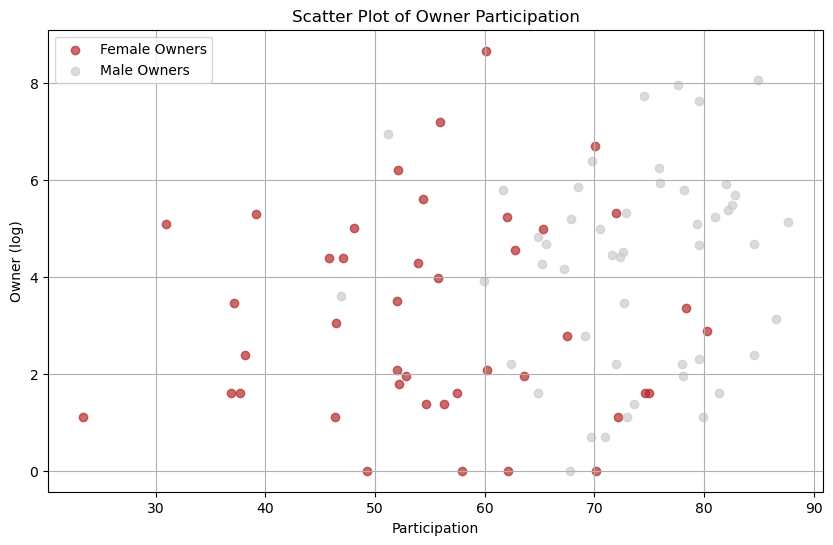

In [123]:
female_df = df6[df6['female_owner'] == 1]
male_df = df6[df6['female_owner'] == 0]
grouped_female = female_df.groupby("country").agg(
    female_owner=('female_owner', 'size'),
    female_participation=('female_participation', 'mean')
).reset_index()
grouped_male = male_df.groupby("country").agg(
    male_owner=('female_owner', 'size'),
    male_participation=('male_participation', 'mean')
).reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(
    grouped_female['female_participation'], 
    np.log(grouped_female['female_owner']),
    color=female_color,
    alpha=0.7,
    label='Female Owners'
)
plt.scatter(
    grouped_male['male_participation'], 
    np.log(grouped_male['male_owner']),
    color=male_color,
    alpha=0.7,
    label='Male Owners'
)
plt.title('Scatter Plot of Owner Participation')
plt.xlabel('Participation')
plt.ylabel('Owner (log)')
plt.legend()
plt.grid(True)
plt.show()

In the scatterplot above, we can see that as men participate in the workforce more, a lot more of them gravitate towards a career in entrepreneurship. Women, on the other hand, do not increasingly gravitate towards entrepreneurship even as they get more involved in the workforce. 

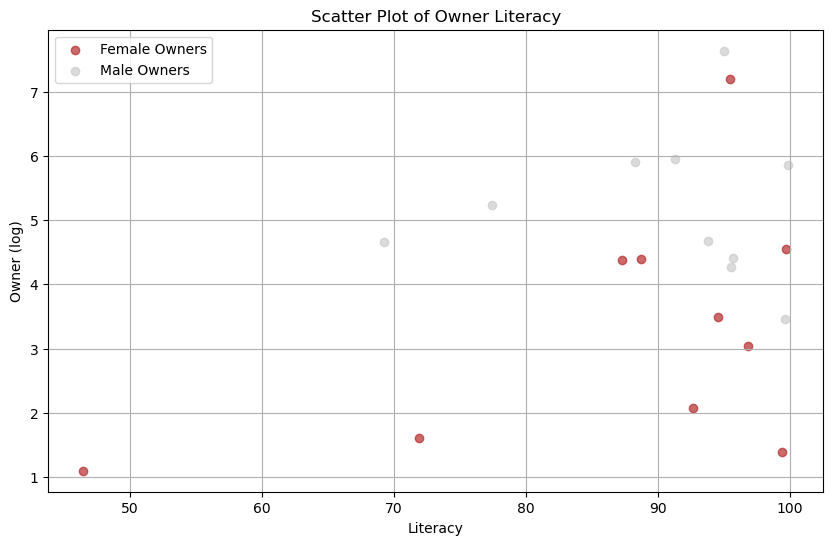

In [124]:
female_df = df6[df6['female_owner'] == 1]
male_df = df6[df6['female_owner'] == 0]
grouped_female = female_df.groupby("country").agg(
    female_owner=('female_owner', 'size'),
    female_literacy=('female_literacy', 'mean')
).reset_index()
grouped_male = male_df.groupby("country").agg(
    male_owner=('female_owner', 'size'),
    male_literacy=('male_literacy', 'mean')
).reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(
    grouped_female['female_literacy'], 
    np.log(grouped_female['female_owner']),
    color=female_color,
    alpha=0.7,
    label='Female Owners'
)
plt.scatter(
    grouped_male['male_literacy'], 
    np.log(grouped_male['male_owner']),
    color=male_color,
    alpha=0.7,
    label='Male Owners'
)
plt.title('Scatter Plot of Owner Literacy')
plt.xlabel('Literacy')
plt.ylabel('Owner (log)')
plt.legend()
plt.grid(True)
plt.show()

In the scatterplot above, we can see that more men and women explore entrepreneurship as there literacy rate increases. However, there are a larger number of men than women who choose to do so. 

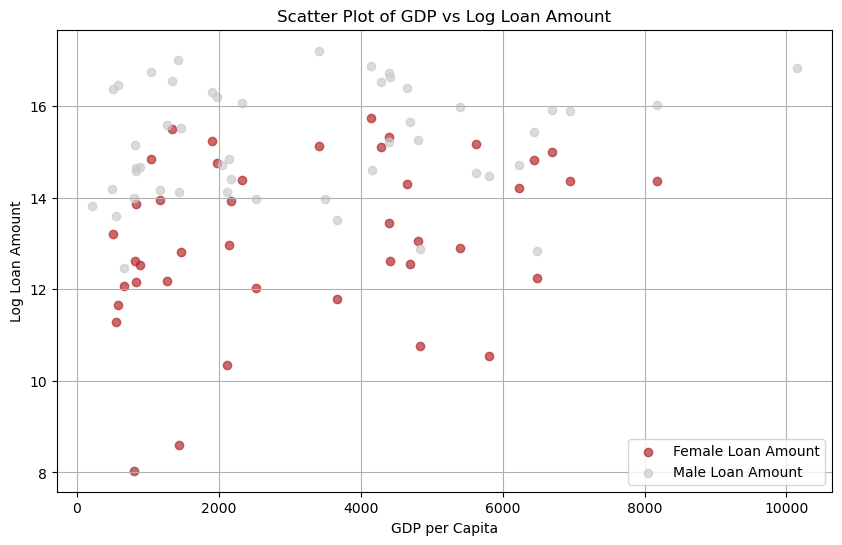

In [125]:
female_df = df6[df6['female_owner'] == 1]
male_df = df6[df6['female_owner'] == 0]
grouped_female = female_df.groupby("country").agg(
    female_loan_amount=('loan_amount', 'sum'),
    gdp_per_capita=('gdp_per_capita', 'mean')
).reset_index()
grouped_male = male_df.groupby("country").agg(
    male_loan_amount=('loan_amount', 'sum'),
    gdp_per_capita=('gdp_per_capita', 'mean')
).reset_index()
plt.figure(figsize=(10, 6))
grouped_female['female_loan_amount_log'] = np.log(grouped_female['female_loan_amount'])
grouped_male['male_loan_amount_log'] = np.log(grouped_male['male_loan_amount'])
plt.scatter(
    grouped_female['gdp_per_capita'], 
    grouped_female['female_loan_amount_log'],  
    color=female_color,
    alpha=0.7,
    label='Female Loan Amount'
)
plt.scatter(
    grouped_male['gdp_per_capita'], 
    grouped_male['male_loan_amount_log'],
    color=male_color,
    alpha=0.7,
    label='Male Loan Amount'
)
plt.title('Scatter Plot of GDP vs Log Loan Amount')
plt.xlabel('GDP per Capita')
plt.ylabel('Log Loan Amount')  
plt.legend()
plt.grid(True)
plt.show()

In the scatterplot above, it can be seen that increasing GDP does not have a strong correlation to the amount of loan a company in a country might receive regardless of if they are owned by men or women. However, it demonstrates that male-owned businesses receive more loans than female-owned businesses regardless of how high a country's GDP might be. 

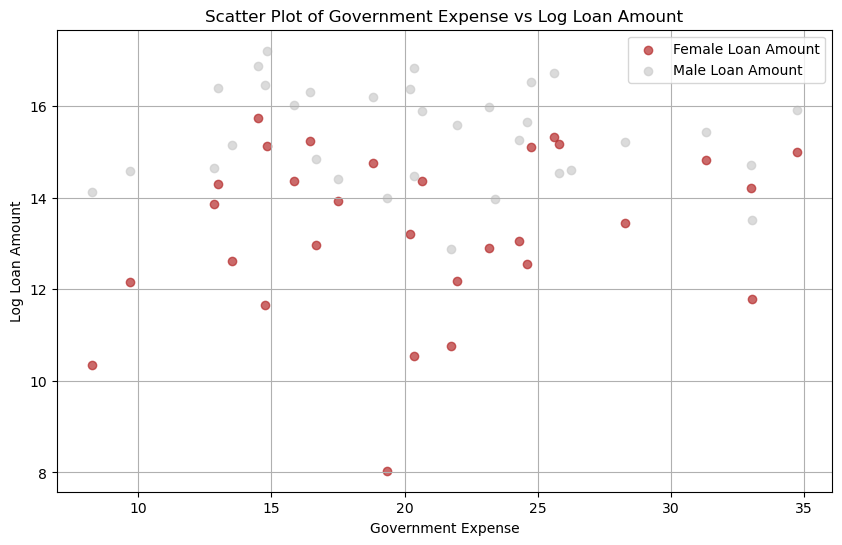

In [126]:
female_df = df6[df6['female_owner'] == 1]
male_df = df6[df6['female_owner'] == 0]
grouped_female = female_df.groupby("country").agg(
    female_loan_amount=('loan_amount', 'sum'),
    gov_expense=('gov_expense', 'mean')
).reset_index()
grouped_male = male_df.groupby("country").agg(
    male_loan_amount=('loan_amount', 'sum'),
    gov_expense=('gov_expense', 'mean')
).reset_index()
plt.figure(figsize=(10, 6))
grouped_female['female_loan_amount_log'] = np.log(grouped_female['female_loan_amount'])
grouped_male['male_loan_amount_log'] = np.log(grouped_male['male_loan_amount'])
plt.scatter(
    grouped_female['gov_expense'], 
    grouped_female['female_loan_amount_log'],  
    color=female_color,
    alpha=0.7,
    label='Female Loan Amount'
)
plt.scatter(
    grouped_male['gov_expense'], 
    grouped_male['male_loan_amount_log'],  
    color=male_color,
    alpha=0.7,
    label='Male Loan Amount'
)
plt.title('Scatter Plot of Government Expense vs Log Loan Amount')
plt.xlabel('Government Expense')
plt.ylabel('Log Loan Amount')  
plt.legend()
plt.grid(True)
plt.show()

In the scatterplot above, we can see that as the government of a country spends more, the loan amount received by female-owned businesses increases slightly, even though it is less than what male-owned companies receive. This shows that increasing support from the government in the improvement of a community allows women with the resources and support they need to pursue entrepreneurial career paths.

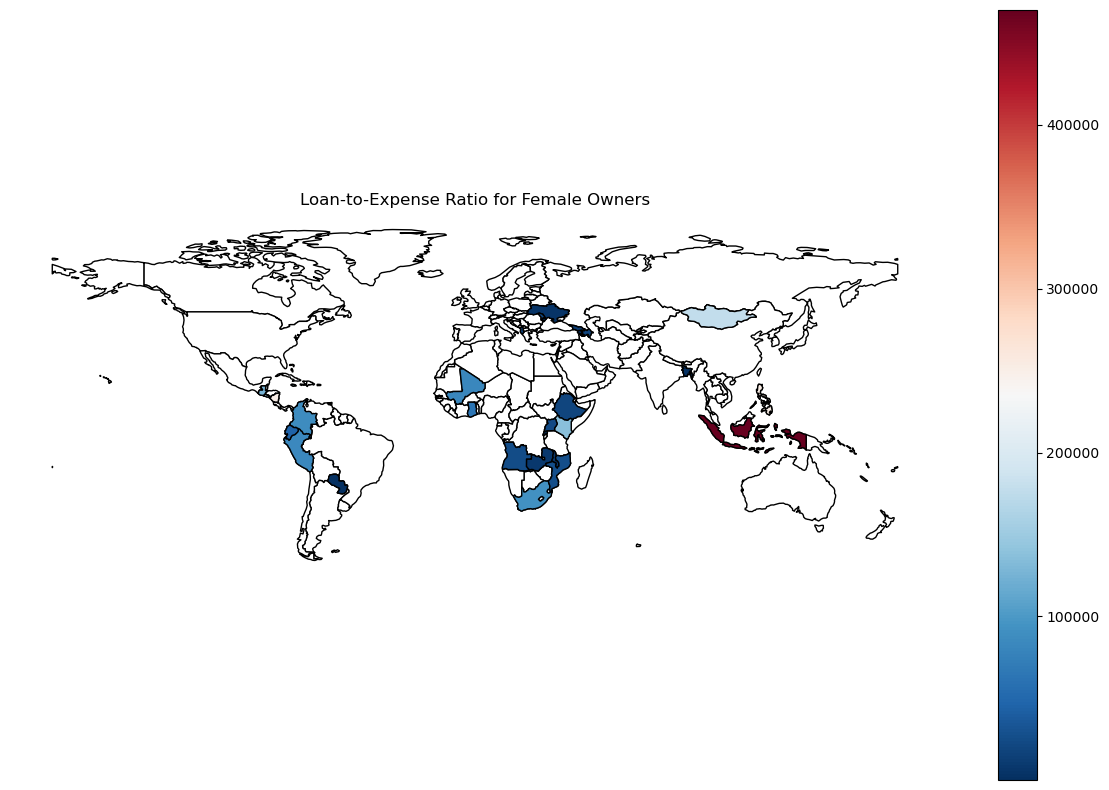

In [28]:
female_df = df6[df6['female_owner'] == 1]
country_ratios = female_df.groupby("country").apply(lambda x: x['loan_amount'].sum() / x['gov_expense'].mean()).reset_index()
country_ratios.columns = ['country', 'loan_to_expense_ratio']
world_3 = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_3 = world_3.set_index("iso_a3")
world_biz = world_3.merge(country_ratios, left_on='name', right_on='country', how='inner')
fig, gax = plt.subplots(figsize=(15, 10))
world_3[world_3['continent'] != 'Antarctica'].plot(ax=gax, edgecolor='black', color='white')
gax.set_title('Loan-to-Expense Ratio for Female Owners')
world_biz.plot(ax=gax, edgecolor='black', column='loan_to_expense_ratio', legend=True, cmap='RdBu_r')
plt.axis('off')
plt.show()

The above map displays the change in the ratio of total loan amount received by female-owned businesses in a country and the amount that its government spent on expenses. Compared to previous maps, it can be seen that this ratio is quite low in regions that were previously highlighted as having less support for female entrepreneurs, such as Southern Africa and Western Asia, and moderate to high in regions highlighted as having equal support for male and female entrepreneurs, such as Eastern Asia. This also supports the notion that increaseed support from the government can help female-owned businesses access more resources and grow.

### Part 4: OLS Regression

The following section will conduct OLS regression to study the relation between whether or not a company is owned by woman and the amount of loan it receives along with other socioeconomic factors discussed above. These factors include whether or not the company is a first time borrower, the GDP of a country, the amount a country's government spends, male literacy rate, female literacy rate, percental of male participation in the workforce, percentage of female participation in the workforce, the country of origin, the business sector a company is a part of, and the business size of the company. All of these factors impact how much financial support a female entrepreneur receives. The gender of a company's owner and the loan amount it receives is linearly correlated as seen in previous analysis which showed that the amount of loan a company receives increases if there are more companies owned by women. As the number of female entrepreneurs increase in a country, entrepreneurship becomes normalized as a viable career path for women thus easing societal pressures. Moreover, more resources and better networks of support become available. 

All models are evaluated by comparing there R-squared adjusted, AIC, and BIC values. R-squared adjusted explains how much of the variance in loan amount is explained by the socioeconomic factors while AIC and BIC measures the goodness of fit of a model both of which penalizes for complexity. The preferred model has a higher R-squared adjusted value and lower AIC and BIC values compared to other models. 

In [12]:
numeric_vars = df6[['loan_amount', 'female_owner', 'first_time_borrower', 'male_participation', 'female_participation', 'male_literacy', 'female_literacy', 'gdp_per_capita', 'gov_expense']]
categorical_vars = df6[['business_sector', 'business_size_categories', 'country']]
encoded_categories = []
mapping_dicts = []
for column in categorical_vars.columns:
    unique_values = categorical_vars[column].unique()
    mapping_dict = {value: index for index, value in enumerate(unique_values)}
    mapping_dicts.append(mapping_dict)
    encoded_column = [mapping_dict[value] for value in categorical_vars[column]]
    encoded_categories.append(encoded_column)
encoded_dfs = [pd.DataFrame(encoded_column, columns=[f'{column}_encoded']) for column, encoded_column in zip(categorical_vars.columns, encoded_categories)]
encoded_df = pd.concat(encoded_dfs, axis=1)
df6 = pd.concat([numeric_vars, encoded_df], axis=1)

The following four OLS regression models all include the country level economic information and business sector level information. They differ in the information on the literacy rate and percentage of the population that is involved in the workforce for both men and women. The aim is to study which of the gender-based factors most impact the amount of loan a company receives if all else is kept constant. 

In [13]:
X1 = ["female_owner","country_encoded","gdp_per_capita","gov_expense","business_sector_encoded","business_size_categories_encoded", "female_literacy", "male_literacy", "female_participation", "male_participation"] 
X2 = ["female_owner","country_encoded","gdp_per_capita","gov_expense","business_sector_encoded","business_size_categories_encoded", "female_literacy", "female_participation"] 
X3 = ["female_owner","country_encoded","gdp_per_capita","gov_expense","business_sector_encoded","business_size_categories_encoded", "male_literacy", "male_participation"]
X4 = ["female_owner","country_encoded","gdp_per_capita","gov_expense","business_sector_encoded","business_size_categories_encoded"]
reg1 = sm.OLS(df6['loan_amount'], sm.add_constant(df6[X1]), missing='drop').fit()
reg2 = sm.OLS(df6['loan_amount'], sm.add_constant(df6[X2]), missing='drop').fit()
reg3 = sm.OLS(df6['loan_amount'], sm.add_constant(df6[X3]), missing='drop').fit()
reg4 = sm.OLS(df6['loan_amount'], sm.add_constant(df6[X4]), missing='drop').fit()

In [16]:
stargazer = Stargazer([reg1, reg2, reg3, reg4])
stargazer.covariate_order(['female_owner', 'const', 'country_encoded', 'gdp_per_capita',
                           'gov_expense', 'business_sector_encoded', 'business_size_categories_encoded',
                           'female_literacy', 'male_literacy', 'female_participation', 'male_participation'])
HTML(stargazer.render_html())

In [17]:
results = [reg1, reg2, reg3, reg4]
aic_values = [res.aic for res in results]
bic_values = [res.bic for res in results]
table = PrettyTable()
table.field_names = ["Model", "AIC", "BIC"]
table.add_row(["Model 1", aic_values[0], bic_values[0]])
table.add_row(["Model 2", aic_values[1], bic_values[1]])
table.add_row(["Model 3", aic_values[2], bic_values[2]])
table.add_row(["Model 4", aic_values[3], bic_values[3]])
html_table = table.get_html_string()
HTML(html_table)

Model,AIC,BIC
Model 1,122999.2951682908,123070.6651069566
Model 2,123125.06563293179,123183.4592191129
Model 3,123771.02794272985,123829.42152891097
Model 4,615398.007522583,615454.5935878028


In the tables above, it can be seen that all the socioeconomic factors explored are statistically significant in explaining the loan amount received by a company. The gender-based information about the literacy rate and workforce involvement of men and women in a country have also especially been shown to be important information. Removing some or all of these information resulted in models with poorer results with the R-squared adjusted value decreasing and AIC and BIC values increasing. It can also be seen that whether or not a company is owned by women is statistically significant and negatively correlated with the amount of loan a company receives. Higher literacy rates provide more women with the skillset that they need to operate businesses and higher participation rates normalize female entrepreneurship in the community. Higher male literacy rate and participation show that they are able to better grow their own businesses while also providing support for female entrepreneurs.

The following four OLS regression models all include information on the literacy rate and percentage of the population that is involved in the workforce for both men and women. They differ in the country level economic information and business sector level information. The aim is to study which of these economic factors most impact the amount of loan a company receives if all else is kept constant. This would allow for analysis in the difference between the amount of support female entrepreneurs receive in different countries.

In [18]:
X5 = ["female_owner","country_encoded","gdp_per_capita","business_size_categories_encoded", "female_literacy", "male_literacy", "female_participation", "male_participation"] 
X6 = ["female_owner","country_encoded","gov_expense","business_sector_encoded", "female_literacy", "male_literacy", "female_participation", "male_participation"] 
X7 = ["female_owner","country_encoded","business_sector_encoded","business_size_categories_encoded", "female_literacy", "male_literacy", "female_participation", "male_participation"] 
X8 = ["female_owner","country_encoded","gdp_per_capita","gov_expense","female_literacy", "male_literacy", "female_participation", "male_participation"] 
reg5 = sm.OLS(df6['loan_amount'], sm.add_constant(df6[X5]), missing='drop').fit()
reg6 = sm.OLS(df6['loan_amount'], sm.add_constant(df6[X6]), missing='drop').fit()
reg7 = sm.OLS(df6['loan_amount'], sm.add_constant(df6[X7]), missing='drop').fit()
reg8 = sm.OLS(df6['loan_amount'], sm.add_constant(df6[X8]), missing='drop').fit()

In [19]:
stargazer = Stargazer([reg5, reg6, reg7, reg8])
stargazer.covariate_order(['female_owner', 'const', 'country_encoded', 'gdp_per_capita',
                           'gov_expense', 'business_sector_encoded', 'business_size_categories_encoded',
                           'female_literacy', 'male_literacy', 'female_participation', 'male_participation'])
HTML(stargazer.render_html())

In [33]:
results = [reg5, reg6, reg7, reg8]
aic_values = [res.aic for res in results]
bic_values = [res.bic for res in results]
table = PrettyTable()
table.field_names = ["Model", "AIC", "BIC"]
table.add_row(["Model 5", aic_values[0], bic_values[0]])
table.add_row(["Model 6", aic_values[1], bic_values[1]])
table.add_row(["Model 7", aic_values[2], bic_values[2]])
table.add_row(["Model 8", aic_values[3], bic_values[3]])
html_table = table.get_html_string()
HTML(html_table)

Model,AIC,BIC
Model 5,136979.03102003748,137038.4033734724
Model 6,123212.51359540776,123270.90718158887
Model 7,137001.4408442357,137060.81319767062
Model 8,123019.4140836866,123077.80766986772


In the tables above, it can be seen that information about the economic condition of a country, how much support the government provides, the business industries, and business sizes are all statistically significant information needed to estimate how much loan a company might receive. It was seen that removing any of these information led to poorer results with the R-squared adjusted value decreasing and AIC and BIC values increasing. While business size and industry dictate how much monetary resource a company will need to operate and, therefore, directly impact that amount of loan they receive, the importance of government expenditure suggests that support from the government in improving the living conditions of a country's citizens allows them to redirect their attention to other activities, including running businesses.

Model 1, which includes all the aforementioned socioeconomic factors to predict loan amount, is the chosen specification as it is the model with the highest R-squared adjusted value which also has the lowest AIC and BIC values. The objective function for this model is as follows:

loan_amount_predicted = -4109.521 female_owner + 2099.944 country_encoded + 95.109 gdp_per_capita -19427.046 gov_expense - 38.818 business_sector_encoded + 13087.686 business_size_categories_encoded + 1752.436 female_literacy + 24025.812 male_literacy -20807.608 female_participation -5275.755 male_participation -894992.314

$$
\frac{1}{N} \sum_{i=1}^N \left((\text{loan_amount}_i) - (\text{loan_amount_predicted}_i) \right)^2
$$

### Machine Learning

The objective function for a decision tree regressor model is as follows:

$$
\frac{1}{N} \sum_{i=1}^N \left(\log(\text{loan_amount}_i) - \log(\text{loan_amount_predicted}_i) \right)^2 + \alpha\text{T}
$$

It is important to choose variables and thresholds that provide the highest information gain at each branch. 

One of the main regularization parameters is the depth of the tree. This dictates the detail to which the data is categorized into different classes. While increasing the depth can improve accuracy, setting it to be too high would lead to the model overfitting as it would memorize all the characteristics of the training model and then perform poorly on unseen datasets.

In [24]:
x_ml = ["country_encoded","gdp_per_capita","gov_expense","business_sector_encoded","business_size_categories_encoded", "female_owner", "female_participation", "female_literacy", "male_participation", "male_literacy"]
df7 = df6[x_ml+["loan_amount"]].dropna()
X = df7[x_ml]

In [25]:
y = np.log(df7["loan_amount"])
df7["log_loan"] = y

Mean Squared Error: 0.48573410678387313


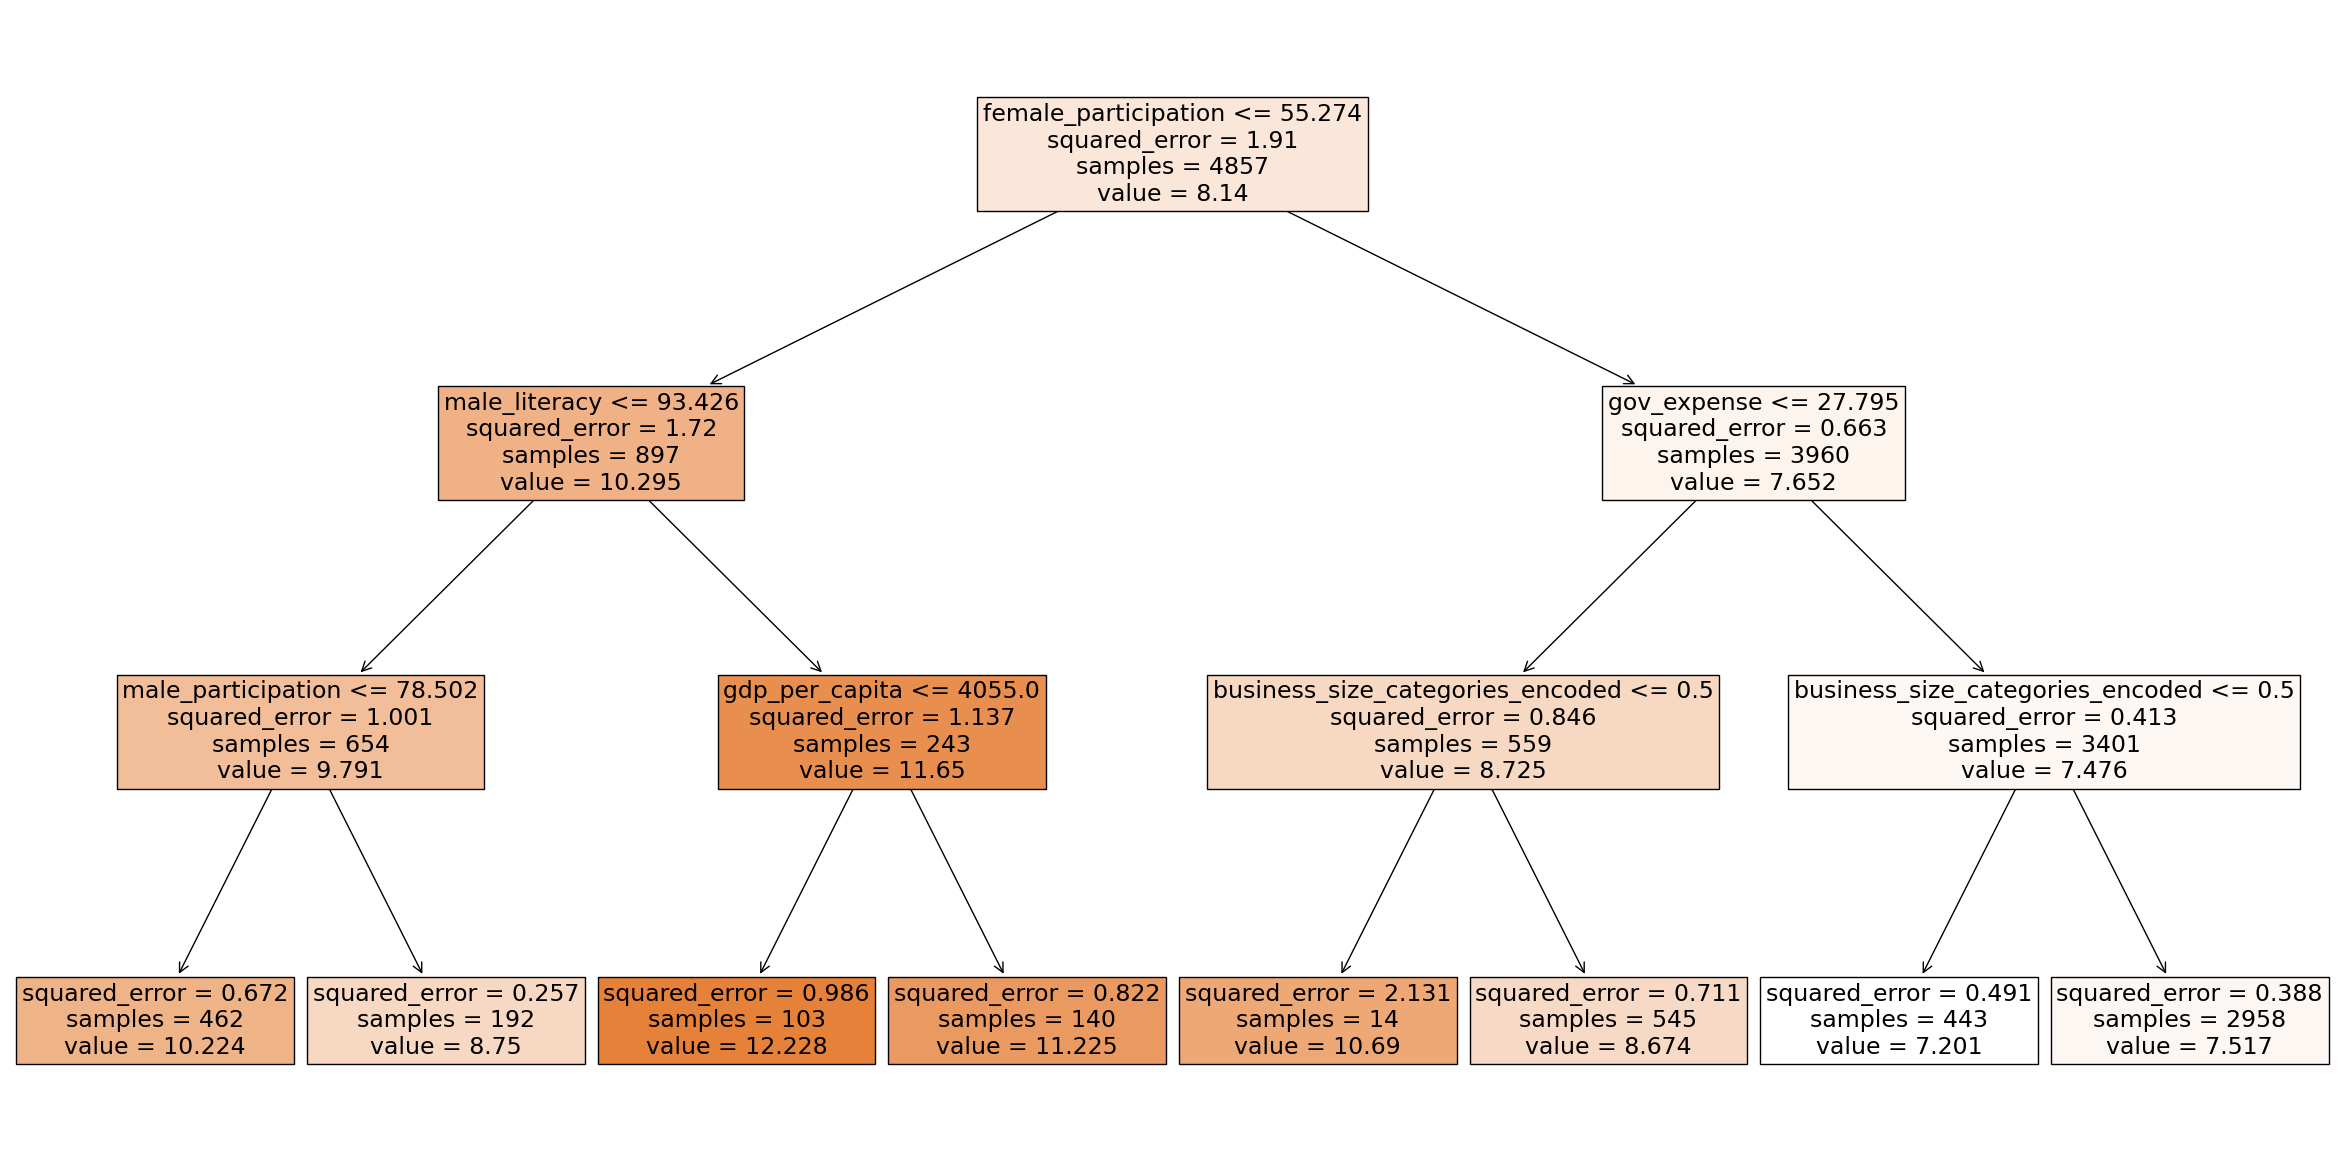

In [89]:
sqft_tree = tree.DecisionTreeRegressor(max_depth=3).fit(X,y)
y_pred_tree = sqft_tree.predict(X)
print('Mean Squared Error:', metrics.mean_squared_error(y, y_pred_tree))
sqrf_fig = plt.figure(figsize=(30,15))
sqrf_fig = tree.plot_tree(sqft_tree, feature_names=X.columns, filled=True, fontsize=17)

In the decision tree above, it can be seen that percentage of female participation in the workforce is the most important factor when it comes to finding out how much loan a company might receive, followed by male literacy rate and government expense. A higher female participation would suggest that more women are able to become entrepreneurs which would eventually lead to women having a network they can turn to for support, increased access to resources and knowledge, and support from their community. Government expense suggests that increased government support in improving the quality of life allows more citizens to focus their attention on establishing and operating businesses and higher male literacy would suggest that men are more capable of running their own businesses and also have the skills needed to support women in their community. 

For a random forest regressor model, apart from the depth of the trees, a main regularization parameter is the number of trees included in the model. Including too many trees can also result in the model overfitting.

0.4147093542931614

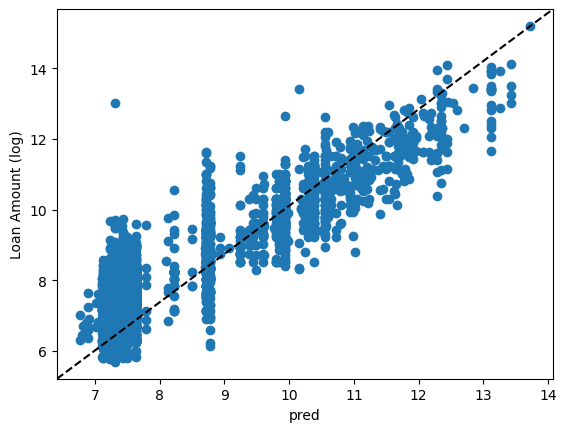

In [90]:
num_features = len(X.columns)
regr1 = RandomForestRegressor(max_features= num_features, random_state=1) 
regr1.fit(X, y)
pred = regr1.predict(X)
plt.scatter(pred, y, label='log loan')
plt.plot([0, 1], [0, 1], '--k', transform=plt.gca().transAxes)
plt.xlabel('pred')
plt.ylabel('Loan Amount (log)')
mean_squared_error(y, pred)

In the visual above, it can be seen that the predicted values follow the trend of the actual log loan amount even though the results are quite spread out thus explaining the low accuracy of the model. The error of the predictive model is quite high. This could be due to other hidden variables that might have a significant impact on the amount of loan a company receives that have not been included in this model. Further research is required to discover these socioeconomic factors. 

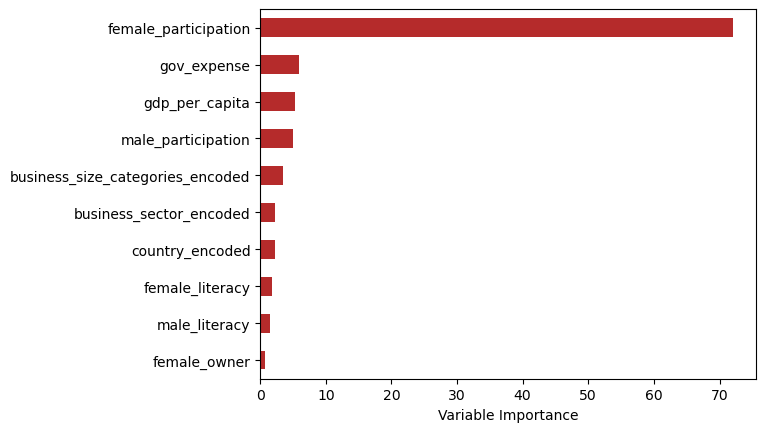

In [127]:
Importance = pd.DataFrame({'Importance':regr1.feature_importances_*100}, index=X.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color=female_color, )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

Similar to the decision tree model, the random forest model also shows that the percentage of female participation in the workforce and government expense are important factors in finding out how much loan a company might receive. It also shows that the GDP per capita is also highly important. It is important to note that while whether or not a company is owned by a women does not rank at the top of the list, it is still included in the list of important variables and therefore the model does show that it significantly contribute to the loan amount.

In [39]:
df6_cleaned = df6.dropna(subset=X1 + ['loan_amount'])
predicted_loan_amounts = reg1.predict(sm.add_constant(df6_cleaned[X1]))
sklearn_mse = mean_squared_error(df6_cleaned['loan_amount'], predicted_loan_amounts)
final = np.log(sklearn_mse)
print(f"MSE: {final}")

MSE: 22.48172251528528


The MSE for the OLS regression model is considerably higher than that of the decision tree model and the random forest model with the random forest model performing the best out of all three. This is because the latter models better capture the nuances between the various socioeconomic factors that do not neccessarily have linear relationships. The decision tree model is able to find various relations between variables and divide the socioeconomic factors into different classes accordingly. The random forest model improves on this by taking the average output of hundreds of individual decision trees, improving the results each time by studying the errors from the previous tree, and this results in higher accuracy.

## Conclusion 

This paper explored whether or not gender of the owner of an organization plays a role in how much loan it receives from the DCA regardless of the industry and country the organization is located in. The statistical analysis and maps generated conclusively support this hypothesis. 

It was seen that male-owned businesses receive far greater financial support through loans than female-owned businesses across business sectors and different categories of business sizes. This finding is supported by previous research that demonstrated that women tend to have lower education and access to finances that would allow them to establish and grow businesses. These differences also exist in certain countries where entrepreneurship is perceived as a masculine career path. Socioeconomic factors that impact how much support female entrepreneurs receive across different regions include government expenditure and the literacy rates and percentage of the population participating in the workforce. Both of these increase the financial and community support that women need in order to grow their businesses. 

This information is crucial for organizations in both developing and developed countries moving forward. The socioeconomic growth of developing regions is a joint effort and it is vital for organizations to understand issues that are preventing them from properly utilizing their resources, in this case their human capital, and achieving their goals. The study conducted in this paper helps organizations such as the USAID's DCA to recognize regions and companies that require their support in different ways and to greater extent. 

One limitation of this paper is that it explores the situation at a specific time. It would be useful to study changes in the socioeconomic factors of interest over time to understand what type of tools have been beneficial in improving the gender disparity and socioeconomic state of each country. Further study also needs to be conducted to establish causal inference. One topic that was highlighted in this paper is that as government expenditure increases, the amount of loans that female-owned businesses received also increases. This correlation is one that should be explored further in an attempt to discover causation, particularly what are the areas in which governments have invested in and how have improvements in those areas lead to women being able to find more financial support. Establishing this relationship would help in finding solutions that can be replicated across countries around the world. 

## References

Adeosun, Oluyemi Theophilus, Ibrahim Shittu Ayodele, and Daniel Ugbede. "Disruptive Financial Innovations: The Case of Nigerian Micro-Entrepreneurs." Journal of Business and Socio-Economic Development 3, no. 1 (2023): 17-35. doi:https://doi.org/10.1108/JBSED-01-2021-0006.

Alona, Martiarena. "How Gender Stereotypes Shape Venture Growth Expectations." Small Business Economics 58, no. 2 (2022): 1015-1034. doi:https://doi.org/10.1007/s11187-020-00431-y.

Babajide, Abiola Ayopo, Demola Obembe, Helen Solomon, and Kassa Woldesenbet. "Microfinance and Entrepreneurship: The Enabling Role of Social Capital Amongst Female Entrepreneurs." International Journal of Social Economics 49, no. 8 (2022): 1152-1171. doi:https://doi.org/10.1108/IJSE-11-2020-0745.

Gupta, Alka, Batra Safal, and Vishal K. Gupta. "Gender, Culture, and Implicit Theories about Entrepreneurs: A Cross-National Investigation." Small Business Economics 58, no. 2 (2022): 1073-1089. doi:https://doi.org/10.1007/s11187-020-00434-9.

Hammami, Samir Marwan, Tareq Muhammad Alhousary, Ahmad Taha Kahwaji, and Syed Ahsan Jamil. "The Status Quo of Omani Female Entrepreneurs: A Story of Multidimensional Success Factors." Quality and Quantity 56, no. 4 (08, 2022): 2063-2089. doi:https://doi.org/10.1007/s11135-021-01208-5.

Hasan, Syed M., M. Raza Mustafa Khan, and Verda Arif. "Willingness of women‐led Businesses in Pakistan to Join Formal e‐commerce Platforms." Asia & the Pacific Policy Studies 9, no. 3 (09, 2022): 246-267. doi:https://doi.org/10.1002/app5.363.

Janowski, Andrzej, Olga Gonchar, and Ruslan Yakovyshyn. "EDUCATION VS. ENTREPRENEURSHIP - BETWEEN THEORY AND PRACTICE: THE CASE OF SMES IN POLAND." E+M Ekonomie a Management 26, no. 1 (2023): 111-125. doi:https://doi.org/10.15240/tul/001/2023-1-007.

Jubril, Bolaji, Timilehin Olasoji Olubiyi, Oluwaseun Samson Sojinu, and Rosemary Ngari. 2022. "Strengthening Gender Equality in Small Business and Achieving Sustainable Development Goals (SDGs): Comparative Analysis of Kenya and Nigeria." Economics, Management and Sustainability 7 (2):19-31. https://doi.org/10.14254/jems.2022.7-2.2.

Khalid, Rimsha, Mohsin Raza, Anusara Sawangchai, and Hassan Raza. "THE CHALLENGES TO WOMEN’S ENTREPRENEURIAL INVOLVEMENT IN THE HOSPITALITY INDUSTRY." Journal of Liberty and International Affairs 8, no. 3 (12, 2022): 220-240. doi:https://doi.org/10.47305/JLIA2283220k.

Krieger, Alexander, Michael Stuetzer, Martin Obschonka, and Katariina Salmela-Aro. "The Growth of Entrepreneurial Human Capital: Origins and Development of Skill Variety." Small Business Economics 59, no. 2 (08, 2022): 645-664. doi:https://doi.org/10.1007/s11187-021-00555-9.

Mashapure, Rahabhi, Brighton Nyagadza, Lovemore Chikazhe, Nothando Msipa, Portia Ngorora Grace Kuda, and Aaram Gwiza. "Challenges Hindering Women Entrepreneurship Sustainability in Rural Livelihoods: Case of Manicaland Province." Cogent Social Sciences 8, no. 1 (01, 2022). doi:https://doi.org/10.1080/23311886.2022.2132675.

Msosa, Steven Kayambazinthu. "Impact of Socio-Demographic Variables on Entrepreneurship Intention in the Higher Education Sector." International Journal of Research in Business and Social Science 12, no. 2 (2023): 422-428. doi:https://doi.org/10.20525/ijrbs.v12i2.2395.

Pourya, Darnihamedani and Terjesen Siri. "Male and Female Entrepreneurs’ Employment Growth Ambitions: The Contingent Role of Regulatory Efficiency." Small Business Economics 58, no. 1 (01, 2022): 185-204. doi:https://doi.org/10.1007/s11187-020-00405-0.

Rajeev, Meenakshi and Supriya Bhandarkar. "Women Online: A Study of Common Service Centres in India using a Capability Approach." Asia & the Pacific Policy Studies 9, no. 3 (09, 2022): 268-287. doi:https://doi.org/10.1002/app5.360.

Sarmah, Ankita, Bedabrat Saikia, and Dhananjay Tripathi. "Does Entrepreneur Gender Matter for Entrepreneurial Motivation: Answers from Micro Small and Medium Enterprises (MSMEs) of Assam." Journal of International Women's Studies 23, no. 5 (04, 2022): 20-40.

Sarfraz, Najia, Sarfraz Raja Sania, and Fozia Malik. "Women Labor Force Participation through HomeBased Business Initiatives." South Asian Studies 37, no. 2 (12, 2022): 409.

Srivastava, Lalima, Michael Austin, Mack Professor, and Nonprofit Management. n.d. "Women and Non-Governmental Organizations in Developing Countries." https://mackcenter.berkeley.edu/sites/default/files/publications/women_and_non-governmental_organizations_in_developing_countries.pdf.

Zwane, Hloniphile Cleopatra and Sheunesu Zhou. "Entrepreneurial Challenges Facing Female Entrepreneurs in Informal Micro Businesses: A Case Study of uMhlathuze Municipality." EUREKA: Social and Humanities no. 2 (2023): 16-26. doi:https://doi.org/10.21303/2504-5571.2023.002581.